In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# Import yfinance
import yfinance as yf  

In [39]:
# Get the data for the stock Apple by specifying the stock ticker, start date, and end date
data = yf.download('HEAR','2017-01-01','2019-11-03')

[*********************100%***********************]  1 of 1 completed


In [3]:
data.loc['2017-01-03']

Open             5.16
High             5.28
Low              5.16
Close            5.20
Adj Close        5.20
Volume       18000.00
Name: 2017-01-03 00:00:00, dtype: float64

In [8]:
data['Close'].iloc[0]

5.199999809265137

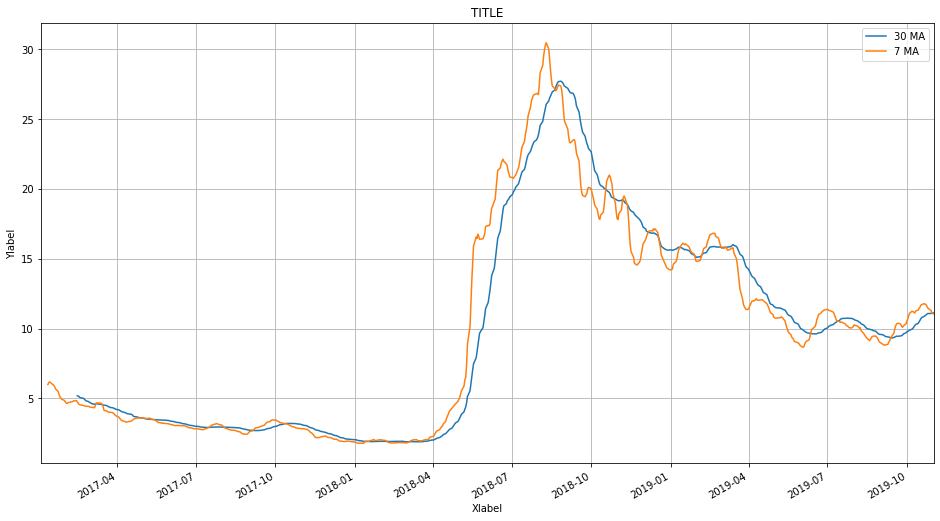

In [43]:
short_window = 7
long_window = 30

data_moving_long = data['Close'].rolling(long_window).mean()
data_moving_short = data['Close'].rolling(short_window).mean()

plt.figure(figsize=(16,9))

data_moving_long.plot(label = str(long_window) + ' MA')
data_moving_short.plot(label = str(short_window) + ' MA')

plt.title('TITLE')
plt.xlabel('Xlabel')
plt.ylabel('Ylabel')
plt.grid()
plt.legend()

plt.show()

In [40]:
def trade_algorithm(data, short_window, long_window):
    
    short_window = short_window
    long_window = long_window

    data_moving_long = data['Close'].rolling(long_window).mean()
    data_moving_short = data['Close'].rolling(short_window).mean()

    data['MA_short'] = data_moving_short
    data['MA_long'] = data_moving_long

    initial_capital = 1

    current_state = 'sell'
    holdings = initial_capital
    
    prev_MA_long = None
    prev_MA_short = None
    
    for index, value in data.iterrows():

        if np.isnan(value['MA_short']) or np.isnan(value['MA_long']):
            continue

    #     print (index, "\n", value['MA_short'], "\n", value['MA_long'])
        
        if (prev_MA_short != None) and (prev_MA_long != None) and ( prev_MA_short < prev_MA_long ) and ( value['MA_short'] > value['MA_long'] ) and (current_state == 'sell'):
            # Buy stock
            print("Buy at: \t", value['Close'], "\nHoldings in USD:\t", holdings)
            print("\n")
            
            holdings = holdings/value['Close']

            current_state = 'buy'


        elif (prev_MA_short != None) and (prev_MA_long != None) and ( prev_MA_short > prev_MA_long ) and ( value['MA_short'] < value['MA_long'] ) and (current_state == 'buy'):
            # Sell stock
            print("Sell at: \t", value['Close'], "\nHoldings in USD:\t", holdings*value['Close'])
            print("\n")
            
            holdings = holdings*value['Close']

            current_state = 'sell'

        prev_MA_short = value['MA_short']
        prev_MA_long = value['MA_long']


    if (current_state == 'buy'):
        return holdings*value['Close']
    else:
        return holdings

In [41]:
trade_algorithm(data, short_window = 50, long_window = 100)

Buy at: 	 2.8399999141693115 
Holdings in USD:	 1


Sell at: 	 2.0799999237060547 
Holdings in USD:	 0.7323943614675941


Buy at: 	 2.9000000953674316 
Holdings in USD:	 0.7323943614675941


Sell at: 	 20.84000015258789 
Holdings in USD:	 5.263137276830099


Buy at: 	 11.050000190734863 
Holdings in USD:	 5.263137276830099




5.2536110186407186